In [4]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection, PatchCollection
from matplotlib.colors import Normalize
from matplotlib.patches import Rectangle, Polygon
import numpy as np

In [2]:
import os
from pathlib import Path
from solution import part_2, parse_pipe_map, follow_pipe

inp = Path(os.path.abspath("input.txt")).read_text()

map, start = parse_pipe_map(inp)
start_pipe = map[start[0]][start[1]]
assert start_pipe
direction = next(iter(start_pipe.connected_directions()))
loop = []
for pos in follow_pipe(map, start, direction):
    loop.append(pos)
    if pos == start:
        break

_, is_loop, is_inside = part_2(inp, debug=False)

567


[]

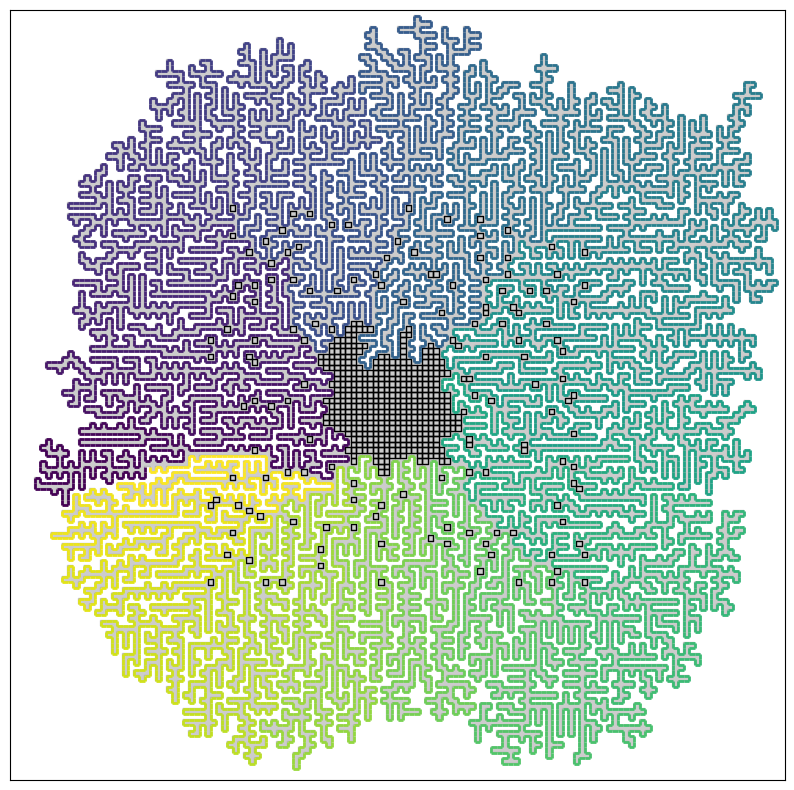

In [18]:
import itertools

fig, ax = plt.subplots(figsize=(10, 10))
ax.axis("equal")

width = len(map[0])
height = len(map)


def j2x(j: int) -> float:
    return j - width / 2


def i2y(i: int) -> float:
    return height / 2 - i


x = [j2x(j) for _, j in loop]
y = [i2y(i) for i, _ in loop]

filling_poly = Polygon(np.array([x + [x[0]], y + [y[0]]]).T, closed=True, color="grey", alpha=0.4)
ax.add_patch(filling_poly)

# from the recipe: https://matplotlib.org/stable/gallery/lines_bars_and_markers/multicolored_line.html
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
lc = LineCollection(segments, cmap="viridis", norm=Normalize(0, len(loop)))  # type: ignore
# Set the values used for colormapping
lc.set_array(range(len(loop)))
lc.set_linewidth(2)
line = ax.add_collection(lc)
# fig.colorbar(line, ax=ax)


#

filled_rectangle_centers = itertools.chain.from_iterable(
    [(i, j) for j, flag in enumerate(row) if flag] for i, row in enumerate(is_inside)
)
patches = [
    Rectangle(
        xy=(j2x(j) - 0.5, i2y(i) - 0.5),
        width=1,
        height=1,
        facecolor="none",
        edgecolor="black",
        # alpha=0.4,
    )
    for i, j in filled_rectangle_centers
]
ax.add_collection(PatchCollection(patches, match_original=True))

ax.set_xlim(-width / 2, width / 2)
ax.set_ylim(-height / 2, height / 2)
ax.set_xticks([])
ax.set_yticks([])